# PROYECTO 2. RKG (RESTART KERNEL GIRLS)
---

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

pd.options.display.max_columns = None

## TRATAMIENTO Y LIMPIEZA DE LOS DATOS A ESTUDIAR

## 1. Unión de las preguntas separadas en varias columnas (q10, q39)

In [42]:
# abrimos el .csv con los datos de Data Analyst para las preguntas relevantes seleccionadas
df = pd.read_csv('../resultados/df_da_relevante.csv', index_col = 0)
df = df.reset_index()
df.sample(2)

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
1006,11231,25-29,Man,China,Bachelor’s degree,1-3 years,SQL,Python,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,"Matplotlib ,Ggplot / ggplot2",Insurance/Risk Assessment,50-249 employees,1-2,Other,Tableau,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1880,21012,30-34,Man,Japan,No formal education past high school,< 1 years,Python,Python,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN,None,Computers/Technology,0-49 employees,1-2,Analyze and understand data to influence produ...,Google Data Studio,NaN,NaN,NaN,NaN,GitHub,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."


In [43]:
# sacamos los nulos para monitorearlos a lo largo del proceso
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
index,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
0,0,0,0,0,0,0,143,144,146,1508,1639,2191,2287,2124,2286,2204,2250,2267,2132,2114,2231,2281,2280,2276,1643,2206,193,114,130,150,227,1069,1858,2266,2252,2278,1739,2208,1863,2104,2251,1884,2253,533


In [44]:
# creamos una lista con las respuestas de la q10 unificadas
lista_futura_q10 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q10" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == ",":
                    valor = ''
    if valor == '':
        valor = np.nan
    try:
        lista_futura_q10.append(valor.strip(','))
    except:
        lista_futura_q10.append(valor)
lista_futura_q10[:5]

['Kaggle Notebooks,Colab Notebooks,Databricks Collaborative Notebooks',
 'Google Cloud Datalab',
 'Kaggle Notebooks,Colab Notebooks',
 'Kaggle Notebooks,Azure Notebooks',
 'IBM Watson Studio']

In [45]:
# creamos una lista con las respuestas de la q39 unificadas
lista_futura_q39 = []

for indice, row in df.iterrows():
    #print(indice, row.index)
    valor = ""
    for i in row.index:
        if "q39" in i:
            if type(row[i]) != float:
                row[i] = row[i].strip()
                valor += row[i] + ","
                if valor == ",":
                    valor = ''
    if valor == '':
        valor = np.nan
    try:
        lista_futura_q39.append(valor.strip(','))
    except:
        lista_futura_q39.append(valor)
lista_futura_q39[:5]

[nan,
 nan,
 'I do not share my work publicly',
 nan,
 'I do not share my work publicly']

In [46]:
# creamos las columnas unificadas en el dataframe y borramos las sobrantes
df['q10'] = lista_futura_q10
df['q39'] = lista_futura_q39
df.head(3)

,index,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q20,q21,q22,q24,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41,q10,q39
0,16,50-54,Man,Belgium,Bachelor’s degree,20+ years,"Python, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Energy/Mining,"1000-9,999 employees",5-9,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Kaggle Notebooks,Colab Notebooks,Databricks Co...",NaN
1,32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,R,R,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN,Ggplot / ggplot2,Manufacturing/Fabrication,250-999 employees,3-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN
2,33,30-34,Woman,Egypt,Bachelor’s degree,3-5 years,Python,R,"Notepad++,Jupyter Notebook",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Non-profit/Service,0-49 employees,0,Analyze and understand data to influence produ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,"Basic statistical software (Microsoft Excel, G...","Kaggle Notebooks,Colab Notebooks",I do not share my work publicly


In [47]:
df.drop(columns=spv.columnas_sobrantes, inplace=True)
df.sample()

,index,age,gender,q3,q4,q6,q7,q8,q9,q14,q20,q21,q22,q24,q34,q35,q41,q10,q39
2296,25954,25-29,Man,India,Professional doctorate,< 1 years,Python,Python,Jupyter Notebook,Matplotlib,Online Service/Internet-based Services,250-999 employees,0,Analyze and understand data to influence produ...,NaN,NaN,NaN,Binder / JupyterHub,NaN


In [48]:
# reordenamos las columnas
df = df.reindex(columns = ['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10', 'q14', 'q20', 'q21', 'q22', 'q24', 'q34', 'q35', 'q39', 'q41'])

In [49]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,144,146,151,193,114,130,150,227,1069,1858,1099,533


In [50]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
1485,25-29,Man,Peru,Bachelor’s degree,3-5 years,"Python, R, Other",R,"Visual Studio Code (VSCode) , Sublime Text, Vi...",None,"Matplotlib ,Ggplot / ggplot2 ,Geoplotlib",Government/Public Service,"1000-9,999 employees",5-9,Analyze and understand data to influence produ...,Microsoft Power BI,NaN,GitHub,"Advanced statistical software (SPSS, SAS, etc.)"
1070,25-29,Man,India,Bachelor’s degree,< 1 years,"Python, SQL",Python,"Notepad++,Jupyter Notebook",Colab Notebooks,"Matplotlib ,Seaborn",Accounting/Finance,"10,000 or more employees",5-9,Analyze and understand data to influence produ...,Other,NaN,GitHub,"Business intelligence software (Salesforce, Ta..."
1913,45-49,Man,Other,Master’s degree,1-3 years,"Python, R, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Notebooks,Binder / JupyterHub,Databrick...","Ggplot / ggplot2 ,D3 js",Government/Public Service,"1000-9,999 employees",10-14,Analyze and understand data to influence produ...,"Microsoft Power BI, Tableau",Microsoft Power BI,I do not share my work publicly,"Local development environments (RStudio, Jupyt..."


In [51]:
# def limpiar_columna(row):
#     if 'Jupyter (JupyterLab, Jupyter Notebooks, etc) ' in row:
#         r = row.replace(r'Jupyter \(JupyterLab, Jupyter Notebooks, etc\) ', 'Jupyter-JupyterLab-JupyterNotebooks', regex = True)
#         return r
#     else:
#         return row

In [52]:
def limpiar_q9(row):
    try:
        if 'Jupyter (JupyterLab, Jupyter Notebooks, etc)' in row:
            r = row.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc)", 'Jupyter-JupyterLab-JupyterNotebooks')
            return r
        else:
            return row
    except:
        return row

In [53]:
df['q9'] = df['q9'].apply(limpiar_q9)

In [54]:
df['q9'].reset_index().sample(10)

,index,q9
1950,1950,"Jupyter-JupyterLab-JupyterNotebooks ,PyCharm ,..."
1994,1994,"RStudio ,Visual Studio Code (VSCode) ,Jupyter ..."
293,293,"RStudio ,Jupyter Notebook"
2260,2260,NaN
1726,1726,"RStudio ,PyCharm"
2189,2189,"Visual Studio ,Jupyter Notebook"
1769,1769,None
190,190,NaN
11,11,Jupyter Notebook
226,226,"Notepad++, Sublime Text,Jupyter Notebook"


In [55]:
def limpiar_q24(row):
    try:
        if 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data' in row:
            r = row.replace('Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Build and/or run the data infrastructure that my business uses for storing analyzing and operationalizing data')
            return r
        else:
            return row
    except:
        return row

In [56]:
df['q24'] = df['q24'].apply(limpiar_q24)
df['q24'].reset_index().sample(10)

,index,q24
992,992,NaN
652,652,Analyze and understand data to influence produ...
529,529,Build and/or run the data infrastructure that...
1413,1413,Analyze and understand data to influence produ...
952,952,Analyze and understand data to influence produ...
565,565,Other
1356,1356,Analyze and understand data to influence produ...
1322,1322,Analyze and understand data to influence produ...
204,204,Analyze and understand data to influence produ...
1617,1617,Analyze and understand data to influence produ...


In [57]:
# def limpiar_q41(row):
#     try:
#         if "Basic statistical software (Microsoft Excel', ' Google Sheets', ' etc.)" in row:
#             r = row.replace("Jupyter (JupyterLab, Jupyter Notebooks, etc)", "Basic statistical software (Microsoft Excel-Google Sheets-etc.)")
#             return r
#         elif "Local development environments (RStudio', ' JupyterLab', ' etc.)" in row:
#             r = row.replace("Local development environments (RStudio', ' JupyterLab', ' etc.)", "Local development environments (RStudio-JupyterLab-etc)")
#             return r
#         elif "Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)" in row:
#             r = row.replace("Business intelligence software (Salesforce',' Tableau',' Spotfire',' etc.)", "Business intelligence software (Salesforce-Tableau-Spotfire.etc.)")
#             return r
#         elif "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" in row:
#             r = row.replace("Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure-etc.)")
#             return r
#             return r
#         elif "Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)" in row:
#             r = row.replace("Cloud-based data software & APIs (AWS', ' GCP', ' Azure', ' etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure-etc.)")
#             return r
#         else:
#             return row
#     except:
#         return row

In [58]:
def limpiar_q41a(row):
    try:
        if "Basic statistical software (Microsoft Excel, Google Sheets, etc.)" in row:
            r = row.replace("Basic statistical software (Microsoft Excel, Google Sheets, etc.)", "Basic statistical software (Microsoft Excel-Google Sheets)")
            return r
        else:
            return row
    except:
        return row

In [59]:
df['q41'] = df['q41'].apply(limpiar_q41a)

In [60]:
def limpiar_q41b(row):
    try:
        if "Local development environments (RStudio, JupyterLab, etc.)" in row:
            r = row.replace("Local development environments (RStudio, JupyterLab, etc.)", "Local development environments (RStudio-JupyterLab)")
            return r
        else:
            return row
    except:
        return row

In [61]:
df['q41'] = df['q41'].apply(limpiar_q41b)

In [62]:
def limpiar_q41c(row):
    try:
        if "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)" in row:
            r = row.replace("Business intelligence software (Salesforce, Tableau, Spotfire, etc.)", "Business intelligence software (Salesforce-Tableau-Spotfire)")
            return r
        else:
            return row
    except:
        return row

In [63]:
df['q41'] = df['q41'].apply(limpiar_q41c)

In [64]:
def limpiar_q41d(row):
    try:
        if "Advanced statistical software (SPSS, SAS, etc.)" in row:
            r = row.replace("Advanced statistical software (SPSS, SAS, etc.)", "Advanced statistical software (SPSS-SAS)")
            return r
        else:
            return row
    except:
        return row

In [65]:
df['q41'] = df['q41'].apply(limpiar_q41d)

In [66]:
def limpiar_q41e(row):
    try:
        if "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)" in row:
            r = row.replace("Cloud-based data software & APIs (AWS, GCP, Azure, etc.)", "Cloud-based data software & APIs (AWS-GCP-Azure)")
            return r
        else:
            return row
    except:
        return row

In [67]:
df['q41'] = df['q41'].apply(limpiar_q41e)

In [68]:
for col in spv.columnas_unidas:
    df[col] = df[col].str.split(',')

In [69]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41
0,0,0,0,0,0,143,144,146,151,193,114,130,150,227,1069,1858,1099,533


In [70]:
# crea un diccionario que asocie cada país con su continente correspondiente
continentes = {'Belgium': 'Europa', 'Ukraine': 'Europa', 'Italy': 'Europa', 'Spain': 'Europa', 'United Kingdom of Great Britain and Northern Ireland': 'Europa', 
               'Germany': 'Europa', 'France': 'Europa', 'Greece': 'Europa', 'Portugal': 'Europa', 'Netherlands': 'Europa', 
               'Poland': 'Europa', 'Switzerland': 'Europa', 'Romania': 'Europa', 'Czech Republic': 'Europa', 'Sweden': 'Europa', 
               'Ireland': 'Europa', 'Denmark': 'Europa', 'Belarus': 'Europa', 'Austria': 'Europa', 'Norway': 'Europa', 
               'China': 'Asia', 'India': 'Asia', 'Israel': 'Asia', 'Pakistan': 'Asia', 'Indonesia': 'Asia', 'Sri Lanka': 'Asia', 
               'Iran, Islamic Republic of...': 'Asia', 'South Korea': 'Asia', 'Russia': 'Asia', 'Taiwan': 'Asia', 
               'Philippines': 'Asia', 'Singapore': 'Asia', 'Japan': 'Asia', 'Saudi Arabia': 'Asia', 'Thailand': 'Asia', 
               'Hong Kong (S.A.R.)': 'Asia', 'Bangladesh': 'Asia', 'Malaysia': 'Asia', 'Viet Nam': 'Asia', 
               'United Arab Emirates': 'Asia', 'Iraq': 'Asia', 'Nepal': 'Asia', 'Kazakhstan': 'Asia', 
               'United States of America': 'América del Norte', 'Canada': 'América del Norte', 
               'Colombia': 'América del Sur', 'Brazil': 'América del Sur', 'Peru': 'América del Sur', 'Mexico': 'América del Sur', 
               'Argentina': 'América del Sur', 'Ecuador': 'América del Sur', 'Chile': 'América del Sur', 
               'Egypt': 'África', 'South Africa': 'África', 'Nigeria': 'África', 'Tunisia': 'África', 'Turkey': 'África', 
               'Kenya': 'África', 'Ghana': 'África', 'Morocco': 'África', 'Ethiopia': 'África', 'Uganda': 'África', 
               'Australia': 'Oceanía', 'I do not wish to disclose my location': 'Otros'}



In [71]:
# crea una nueva columna con los continentes correspondientes a cada país
df['continente'] = df['q3'].map(continentes)

In [72]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
1776,25-29,Man,India,Bachelor’s degree,1-3 years,[ Other],Other,[ Other],[Other],[ None],[Computers/Technology],"1000-9,999 employees",0,[Analyze and understand data to influence prod...,Other,NaN,[I do not share my work publicly],NaN,Asia
961,25-29,Woman,Kenya,Some college/university study without earning ...,I have never written code,NaN,NaN,NaN,NaN,NaN,[Academics/Education],"1000-9,999 employees",15-19,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Basic statistical software (Microsoft Excel-G...,África
786,30-34,Man,Canada,Master’s degree,5-10 years,"[Python, R]",Python,[Jupyter-JupyterLab-JupyterNotebooks ],[Kaggle Notebooks],"[ Matplotlib , Seaborn ]",[Non-profit/Service],50-249 employees,1-2,[ Build and/or run the data infrastructure tha...,Tableau,NaN,[NBViewer],[Advanced statistical software (SPSS-SAS)],América del Norte


In [73]:
# # utiliza pd.cut para dividir los datos en base a la columna de continentes
# df['continente_categoría'] = pd.cut(df['continente'], 
#                                      bins=['Europa', 'Asia', 'América del Norte', 'América del Sur', 'África', 'Oceanía', 'Otros'], 
#                                      labels=['Europa', 'Asia', 'América del Norte', 'América del Sur', 'África', 'Oceanía', 'Otros'])

# # elimina la columna de continentes si ya no la necesitas
# #df.drop('continente', axis=1, inplace

In [74]:
df.to_csv('../resultados/df_da_relevante_limpio.csv')

In [75]:
df.head()

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
0,50-54,Man,Belgium,Bachelor’s degree,20+ years,"[Python, SQL]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Jupyter...","[Kaggle Notebooks, Colab Notebooks, Databricks...","[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Energy/Mining],"1000-9,999 employees",5-9,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Local development environments (RStudio-Jupyt...,Europa
1,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,[ R],R,[RStudio ],[Google Cloud Datalab],[Ggplot / ggplot2 ],[Manufacturing/Fabrication],250-999 employees,3-4,NaN,NaN,NaN,NaN,NaN,América del Norte
2,30-34,Woman,Egypt,Bachelor’s degree,3-5 years,[Python],R,"[ Notepad++, Jupyter Notebook]","[Kaggle Notebooks, Colab Notebooks]",[ None],[Non-profit/Service],0-49 employees,0,[Analyze and understand data to influence prod...,None,NaN,[I do not share my work publicly],[Basic statistical software (Microsoft Excel-G...,África
3,22-24,Man,China,Some college/university study without earning ...,< 1 years,"[Python, SQL, C, C++, Java, Javascript, ...",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Visual ...","[Kaggle Notebooks, Azure Notebooks]","[ Matplotlib , Plotly / Plotly Express ]",[Computers/Technology],0-49 employees,0,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Basic statistical software (Microsoft Excel-G...,Asia
4,40-44,Man,South Africa,Master’s degree,1-3 years,"[ R, SQL]",R,"[RStudio , Jupyter Notebook]",[IBM Watson Studio],"[Plotly / Plotly Express , Ggplot / ggplot2 , ...",[Manufacturing/Fabrication],250-999 employees,1-2,[Analyze and understand data to influence prod...,Microsoft Power BI,NaN,[I do not share my work publicly],[Local development environments (RStudio-Jupyt...,África


In [76]:
df_q7 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q21', 'q22', 'q34', 'q35']]
df_q9 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q9', 'q21', 'q22', 'q34', 'q35']]
df_q10 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q10', 'q21', 'q22', 'q34', 'q35']]
df_q14 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q14', 'q21', 'q22', 'q34', 'q35']]
df_q20 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q20', 'q21', 'q22', 'q34', 'q35']]
df_q24 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q24', 'q34', 'q35']]
df_q39 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q39']]
df_q41 = df[['age', 'gender', 'q3', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35', 'q41']]

In [77]:
df_q7 = df.explode('q7')
df_q9 = df.explode('q9')
df_q10 = df.explode('q10')
df_q14 = df.explode('q14')
df_q20 = df.explode('q20')
df_q24 = df.explode('q24')
df_q39 = df.explode('q39')
df_q41 = df.explode('q41')

In [78]:
df_q7.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
1077,22-24,Woman,Nigeria,Bachelor’s degree,< 1 years,Python,SQL,[Jupyter Notebook],[Kaggle Notebooks],"[ Matplotlib , Seaborn ]",[Retail/Sales],0-49 employees,1-2,[Analyze and understand data to influence prod...,Tableau,NaN,[GitHub],[Business intelligence software (Salesforce-Ta...,África
428,30-34,Man,Other,Bachelor’s degree,1-3 years,Python,SQL,[Jupyter Notebook],"[IBM Watson Studio, Other]","[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Retail/Sales],250-999 employees,3-4,[Analyze and understand data to influence prod...,Microsoft Power BI,NaN,[I do not share my work publicly],[Business intelligence software (Salesforce-Ta...,NaN
764,30-34,Man,Nigeria,Master’s degree,1-3 years,SQL,Python,"[Visual Studio Code (VSCode) , Jupyter Notebook]",[Kaggle Notebooks],"[ Matplotlib , Seaborn ]",[Computers/Technology],0-49 employees,1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Basic statistical software (Microsoft Excel-G...,África


<Axes: xlabel='count', ylabel='q7'>

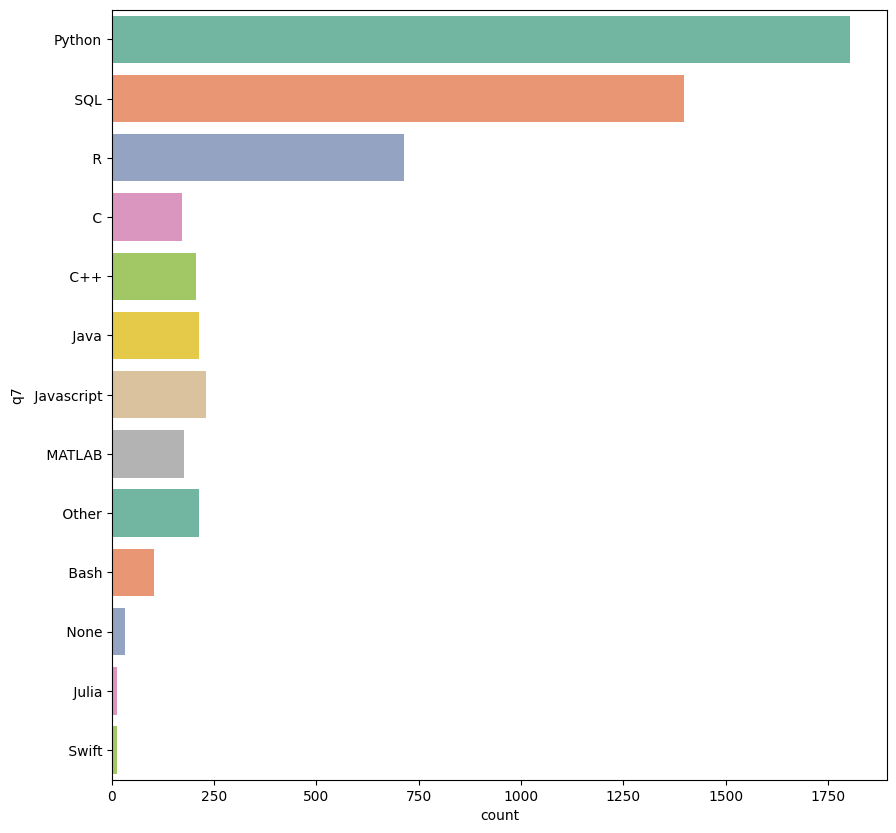

In [83]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q7', data = df_q7, palette = 'Set2')

<Axes: xlabel='count', ylabel='q7'>

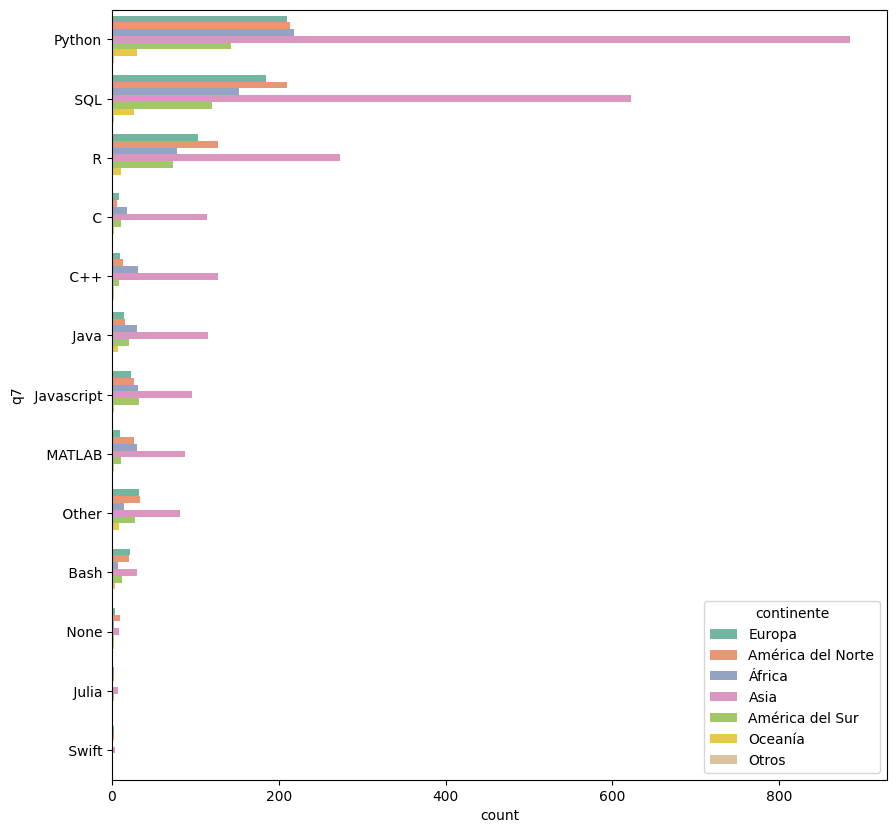

In [82]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q7', hue = 'continente', data = df_q7, palette = 'Set2')

<Axes: xlabel='count', ylabel='q14'>

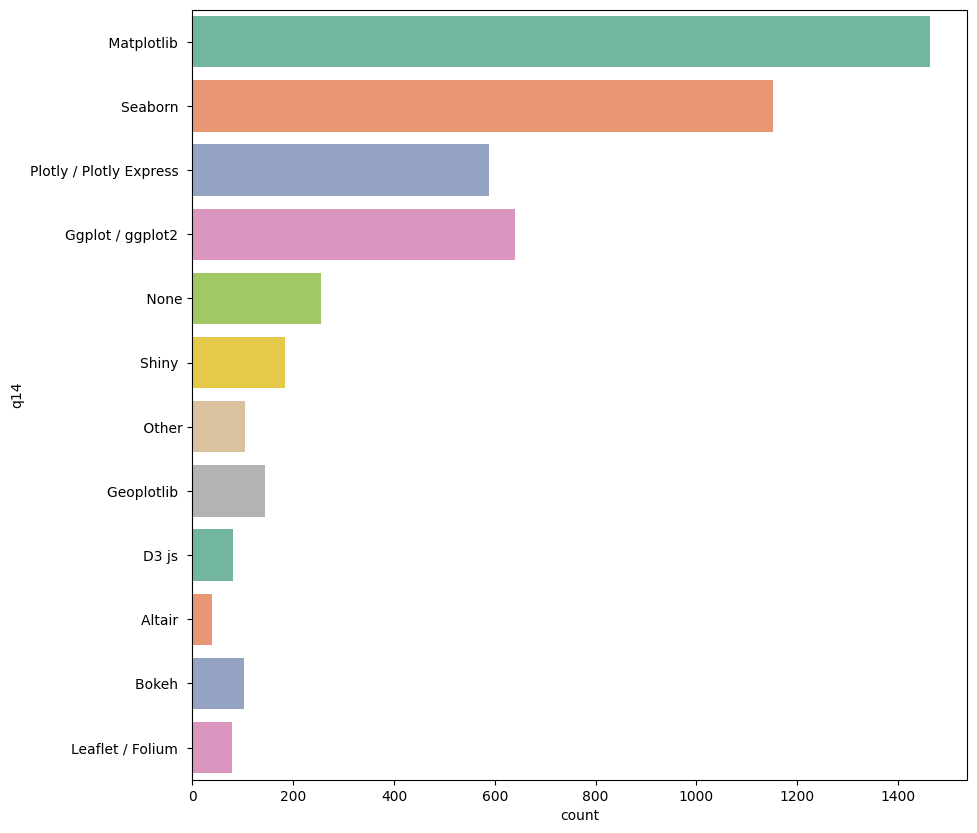

In [86]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q14', data = df_q14, palette = 'Set2')

<Axes: xlabel='count', ylabel='q24'>

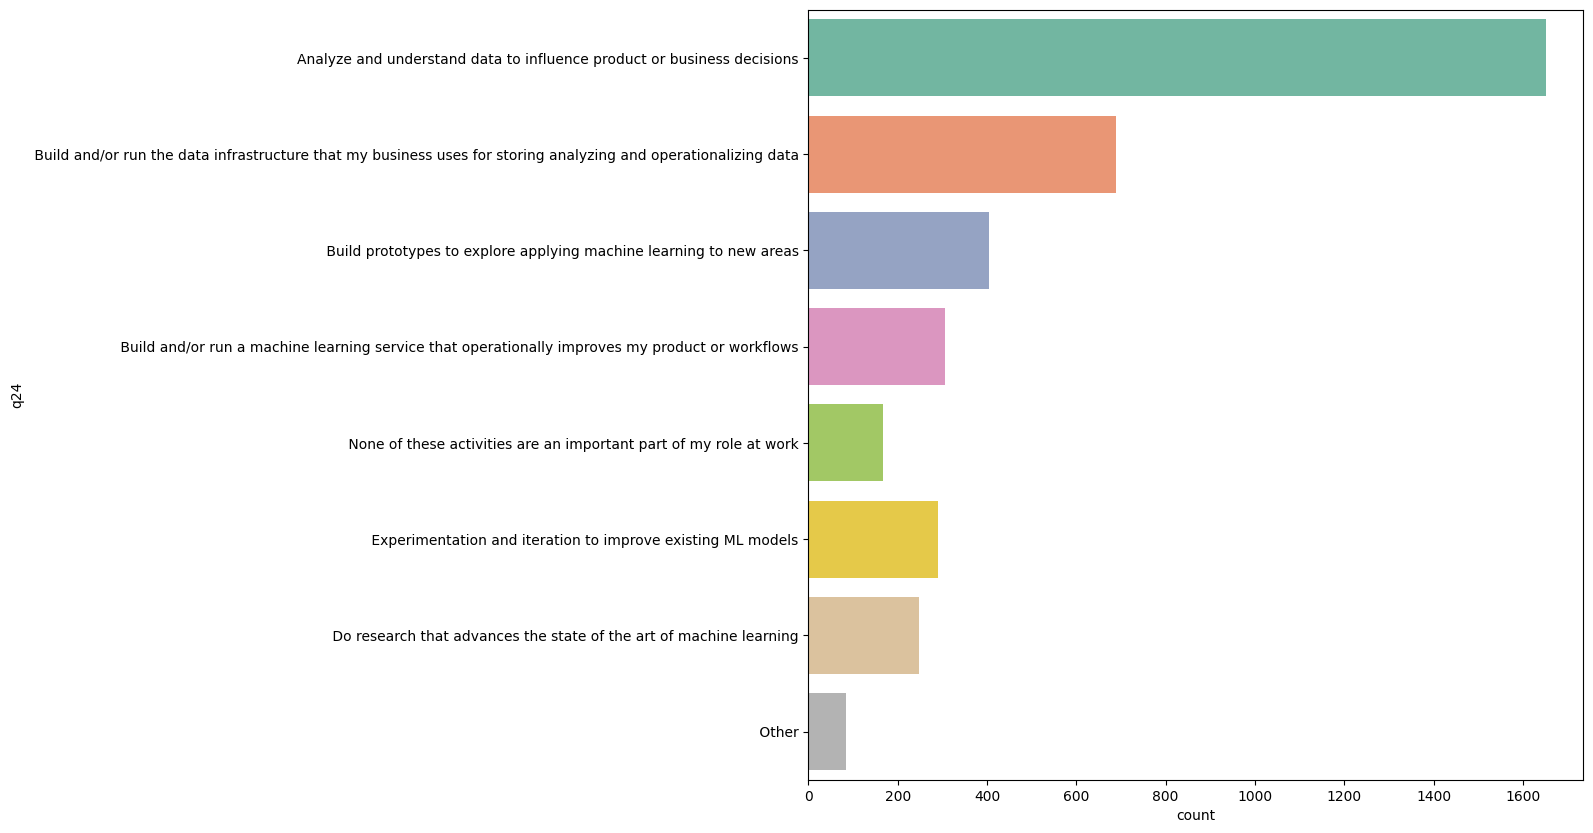

In [89]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q24', data = df_q24, palette = 'Set2')

<Axes: xlabel='count', ylabel='q39'>

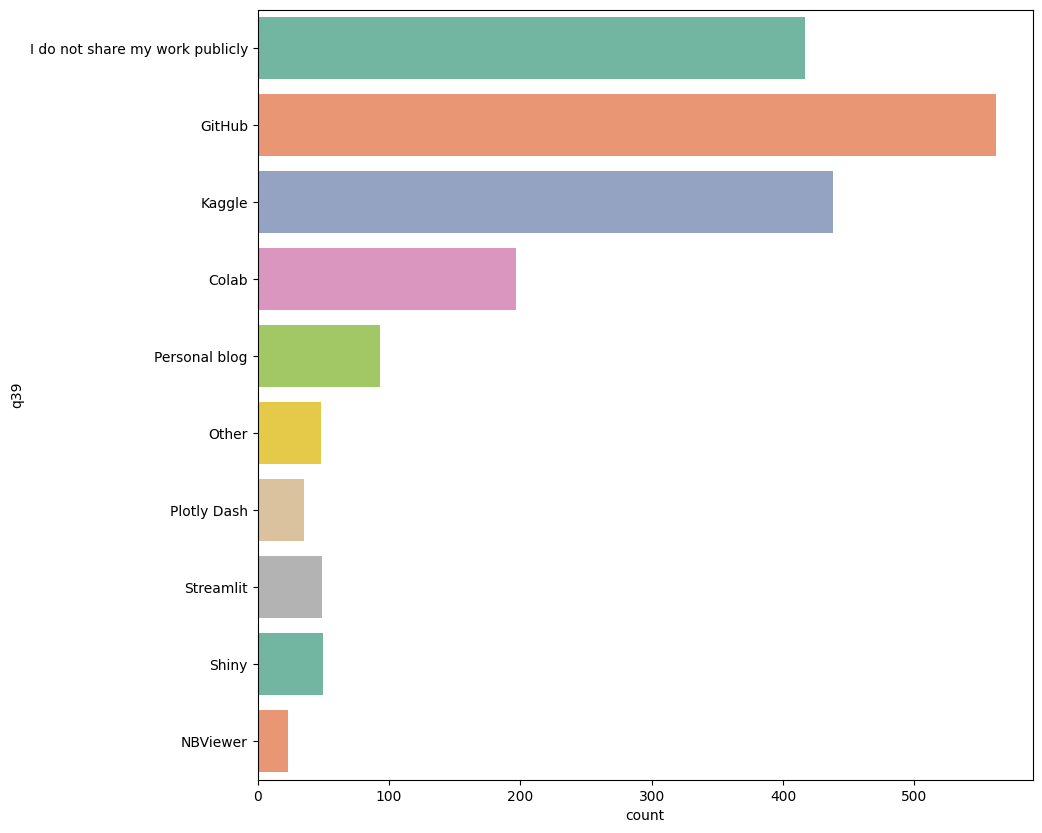

In [91]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q39', data = df_q39, palette = 'Set2')

<Axes: xlabel='count', ylabel='q39'>

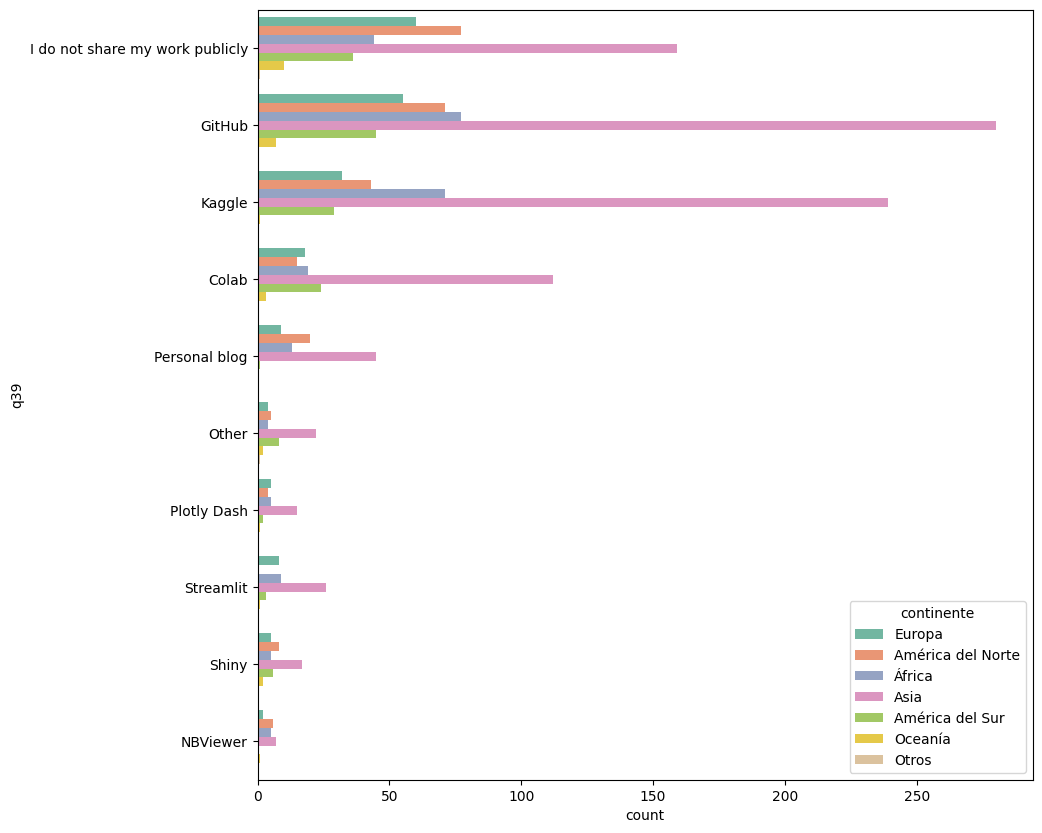

In [93]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q39', hue= 'continente', data = df_q39, palette = 'Set2')

<Axes: xlabel='count', ylabel='q41'>

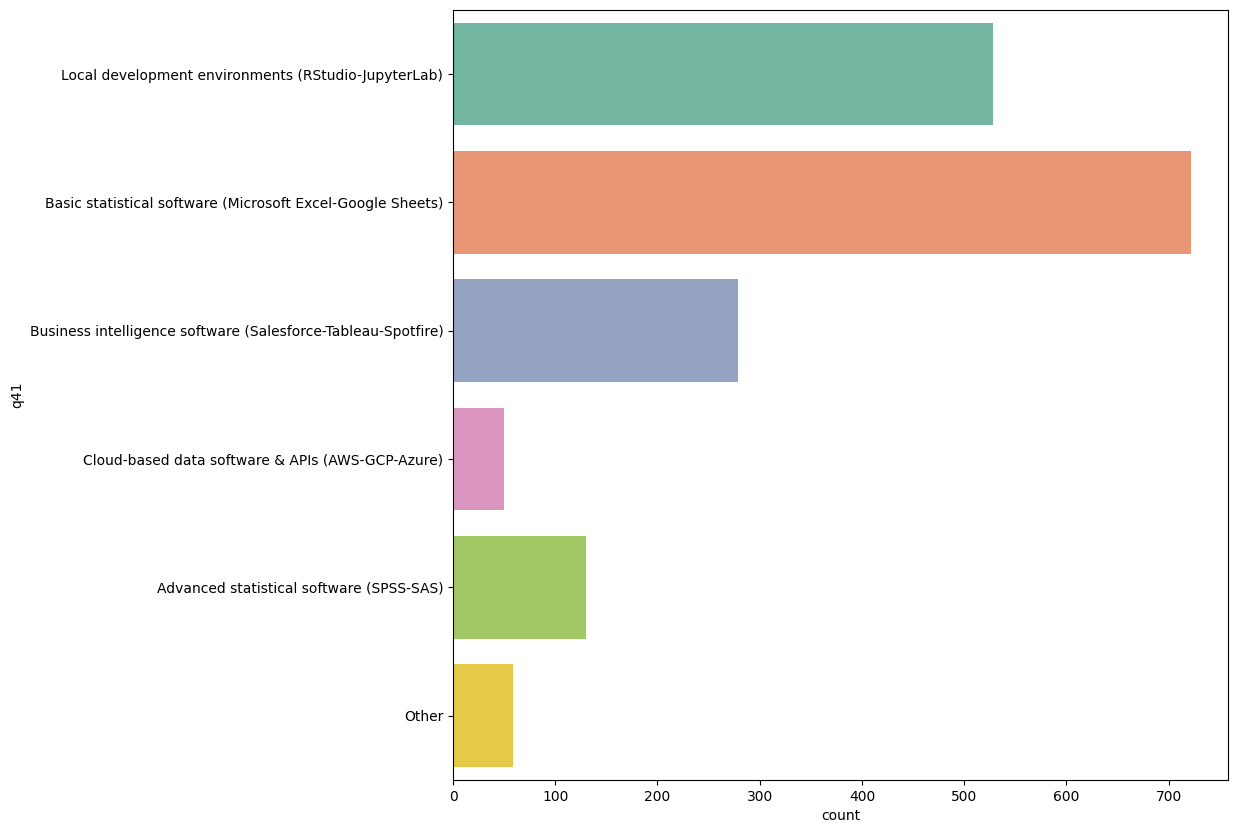

In [94]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'q41', data = df_q41, palette = 'Set2')

In [95]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
835,18-21,Man,Pakistan,Bachelor’s degree,1-3 years,"[Python, Javascript]",Python,"[Visual Studio Code (VSCode) , Jupyter Notebook]","[Kaggle Notebooks, Colab Notebooks, Binder / J...","[ Matplotlib , Seaborn ]",[Computers/Technology],0-49 employees,1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Business intelligence software (Salesforce-Ta...,Asia
2200,22-24,Woman,Other,Bachelor’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,[Academics/Education],0-49 employees,1-2,[ Other],NaN,NaN,NaN,[Basic statistical software (Microsoft Excel-G...,NaN
350,60-69,Man,United States of America,Some college/university study without earning ...,20+ years,"[Python, R, SQL]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , RStudio...",[None],"[ Matplotlib , Seaborn ]",[Insurance/Risk Assessment],"10,000 or more employees",1-2,[Analyze and understand data to influence prod...,Tableau,NaN,[GitHub],[Local development environments (RStudio-Jupyt...,América del Norte


<Axes: xlabel='count', ylabel='age'>

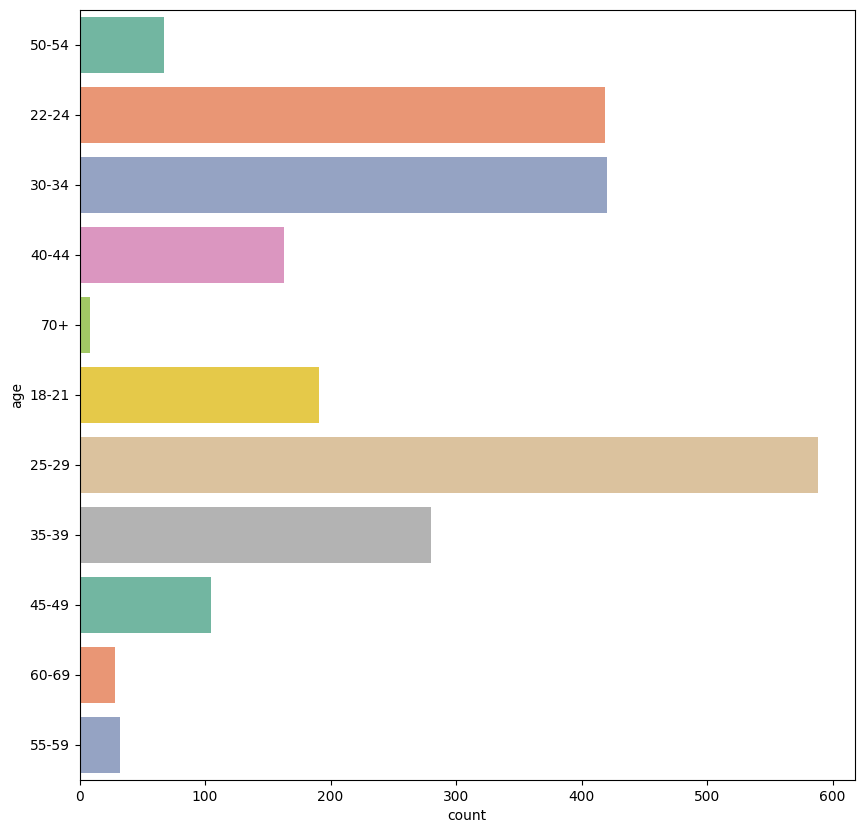

In [101]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'age', data = df, palette = 'Set2')


<Axes: xlabel='count', ylabel='age'>

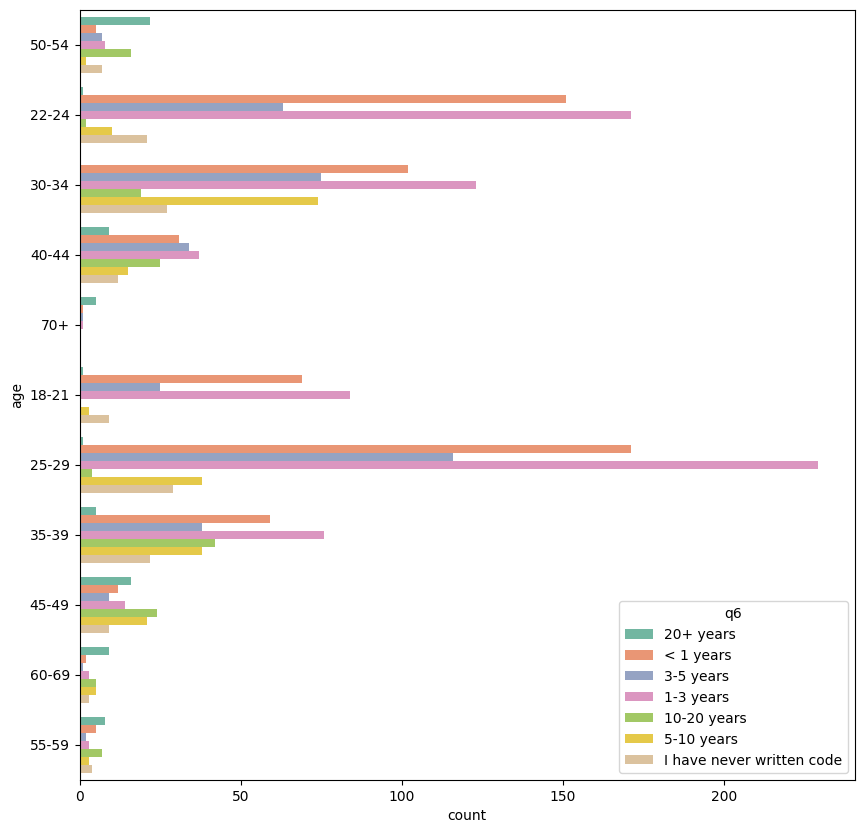

In [103]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'age', hue='q6', data = df, palette = 'Set2')

<Axes: xlabel='count', ylabel='q6'>

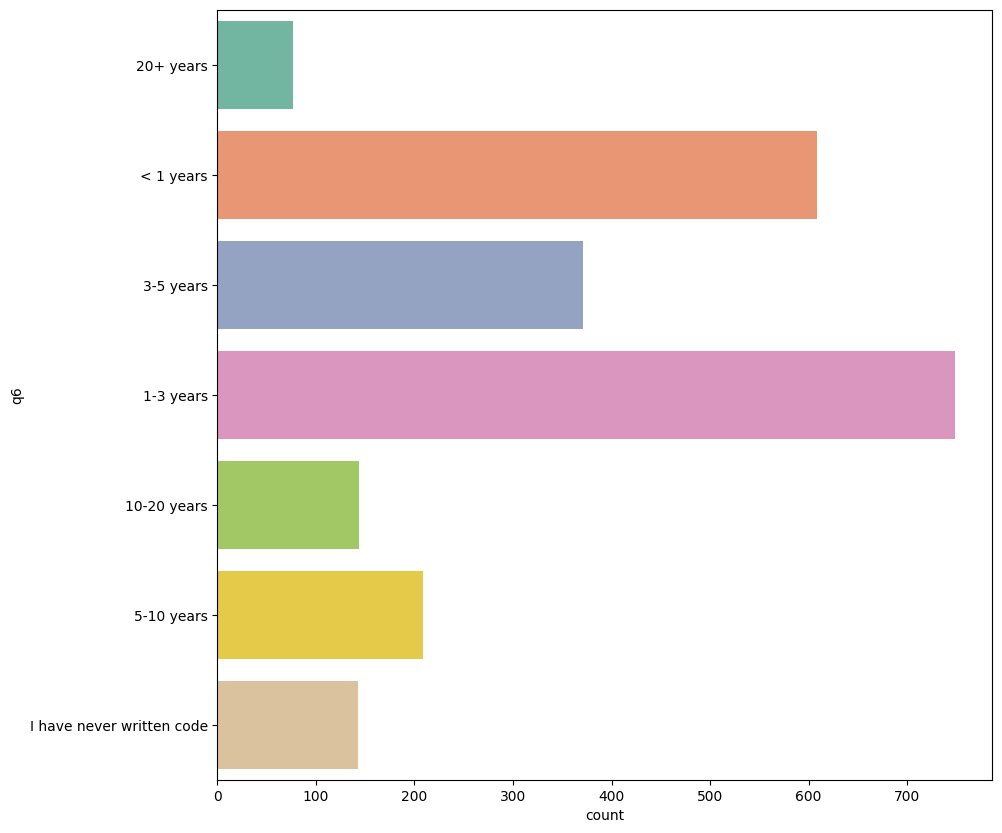

In [104]:
plt.figure(figsize = (10,10))
sns.countplot(y='q6', data = df, palette = 'Set2')

In [105]:
df.sample(2)

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
2031,25-29,Woman,South Korea,I prefer not to answer,1-3 years,[Python],Python,[PyCharm ],[Kaggle Notebooks],[ Other],[Other],0-49 employees,1-2,[ Other],Other,NaN,NaN,NaN,Asia
1539,30-34,Man,Viet Nam,Bachelor’s degree,< 1 years,[Python],Python,[Jupyter Notebook],[Colab Notebooks],"[ Matplotlib , Seaborn ]",[Manufacturing/Fabrication],"10,000 or more employees",1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Basic statistical software (Microsoft Excel-G...,Asia


<Axes: xlabel='count', ylabel='q9'>

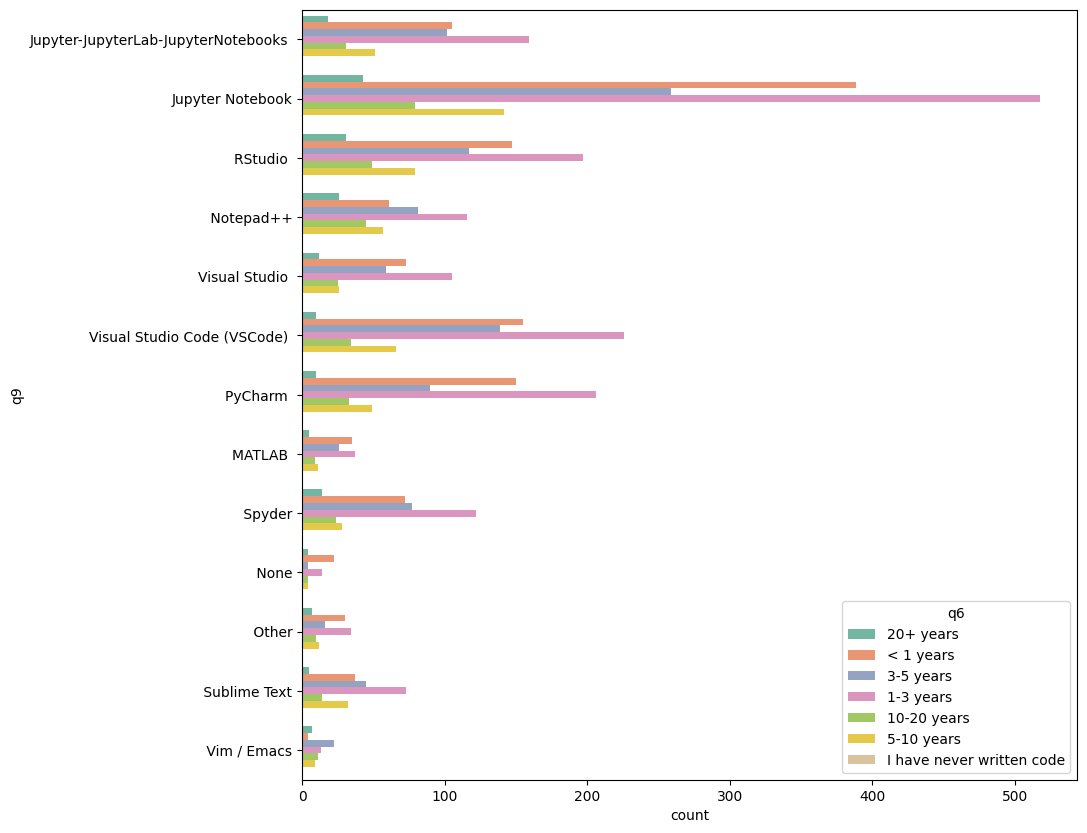

In [108]:
plt.figure(figsize = (10,10))
sns.countplot(y='q9', data = df_q9, hue= 'q6', palette = 'Set2')

<Axes: xlabel='count', ylabel='q3'>

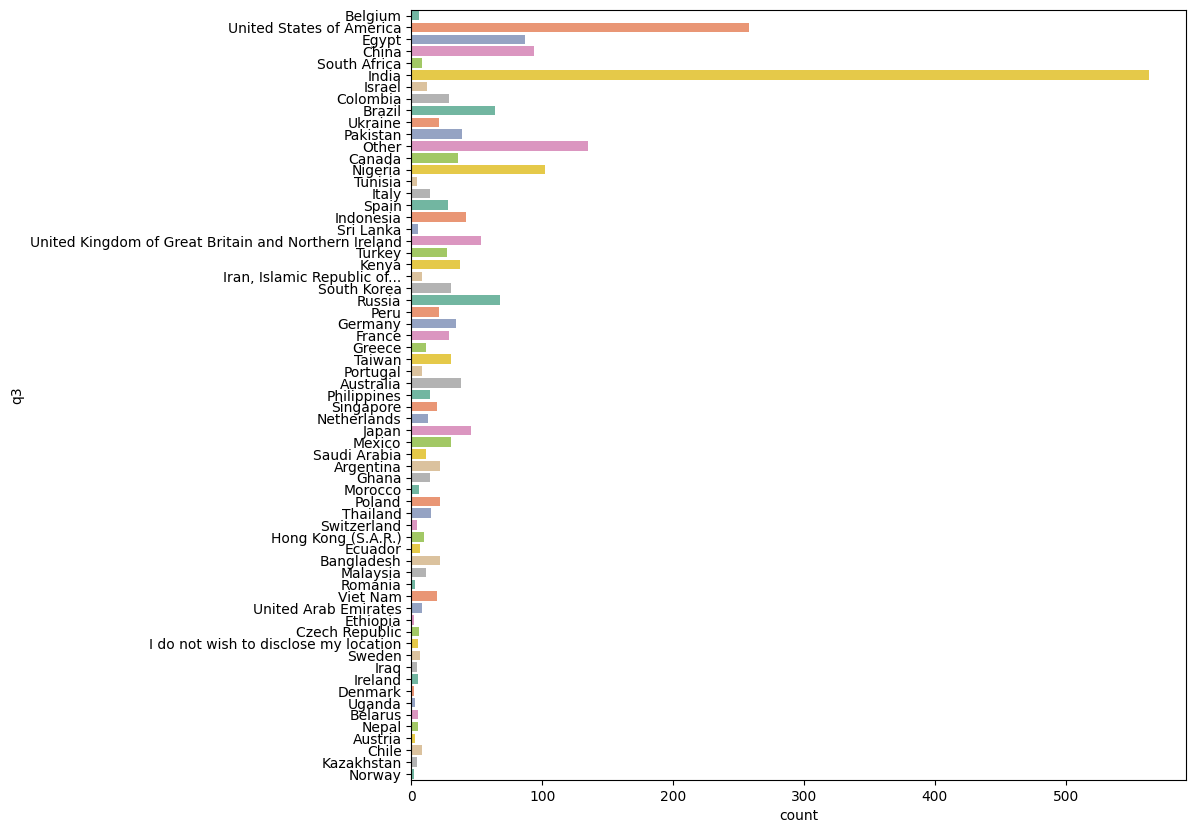

In [109]:
plt.figure(figsize = (10,10))
sns.countplot(y='q3', data = df,  palette = 'Set2')

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
1820,50-54,Man,Greece,No formal education past high school,20+ years,"[Python, R, Other]",R,"[RStudio , Spyder, Notepad++, Jupyter Notebook]",[Google Cloud Notebooks (AI Platform / Vertex ...,[Ggplot / ggplot2 ],[Retail/Sales],50-249 employees,1-2,[ None of these activities are an important pa...,NaN,NaN,NaN,[Local development environments (RStudio-Jupyt...,Europa


In [130]:
df['continente'].unique()

array(['Europa', 'América del Norte', 'África', 'Asia', 'América del Sur',
       nan, 'Oceanía', 'Otros'], dtype=object)

In [120]:
europa = df_q7[df_q7['continente'] == 'Europa']

In [150]:
df_eaa = df_q7[df_q7['continente'].isin(['Europa', 'América del Norte', 'Asia'])]


In [151]:
# q7_percent = df_eaa.groupby('continente')['q7'].value_counts()*100/df_eaa.shape[0]
# df_q7_percent = pd.DataFrame(q7_percent)

<Axes: xlabel='count', ylabel='q7'>

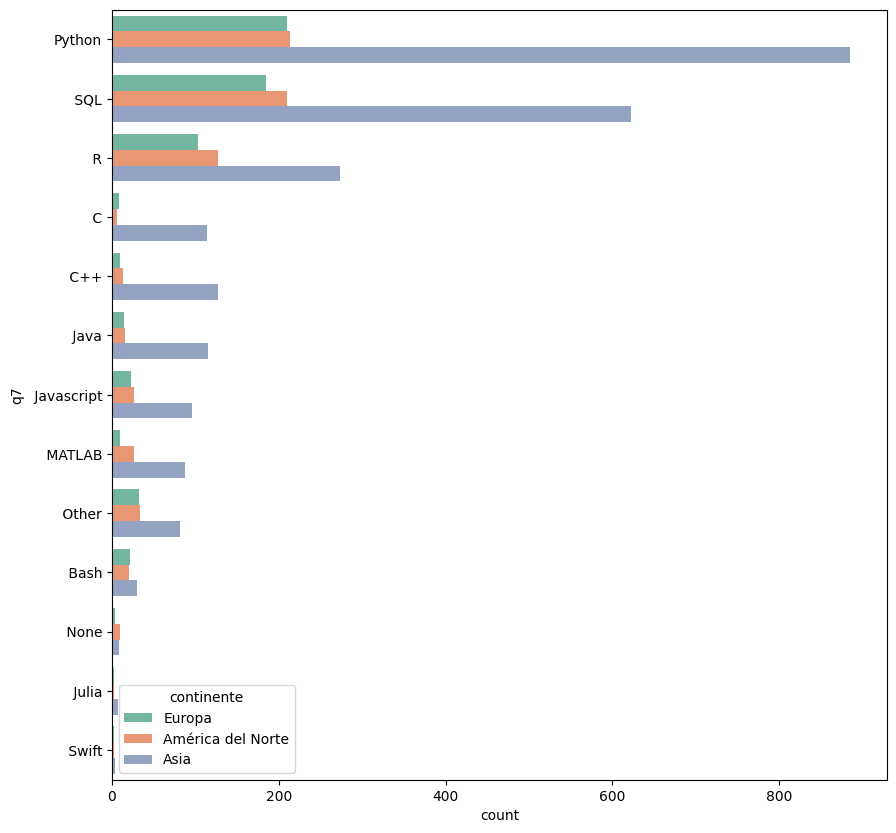

In [160]:
plt.figure(figsize = (10,10))
sns.countplot(y='q7', hue = 'continente', data = df_eaa, palette = 'Set2')

In [159]:
df[df['continente'] == 'Europa']

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
0,50-54,Man,Belgium,Bachelor’s degree,20+ years,"[Python, SQL]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Jupyter...","[Kaggle Notebooks, Colab Notebooks, Databricks...","[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Energy/Mining],"1000-9,999 employees",5-9,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Local development environments (RStudio-Jupyt...,Europa
14,22-24,Man,Ukraine,Doctoral degree,3-5 years,"[Python, SQL, C++, Other]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Visual ...","[Kaggle Notebooks, Colab Notebooks]","[ Matplotlib , Seaborn ]",[Other],0-49 employees,1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Advanced statistical software (SPSS-SAS)],Europa
24,25-29,Woman,Italy,Master’s degree,1-3 years,"[Python, R, Other]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , RStudio...",[Binder / JupyterHub],"[Ggplot / ggplot2 , Shiny ]",[Academics/Education],250-999 employees,1-2,[ Build prototypes to explore applying machine...,NaN,NaN,NaN,[Advanced statistical software (SPSS-SAS)],Europa
26,50-54,Man,Spain,Bachelor’s degree,1-3 years,[ R],R,[RStudio ],[None],[Ggplot / ggplot2 ],[Online Service/Internet-based Services],50-249 employees,3-4,[Analyze and understand data to influence prod...,Google Data Studio,NaN,[GitHub],[Local development environments (RStudio-Jupyt...,Europa
33,30-34,Woman,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,< 1 years,"[Python, SQL]",Python,"[RStudio , Visual Studio , Visual Studio Code ...",[None],"[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Online Business/Internet-based Sales],50-249 employees,3-4,[Analyze and understand data to influence prod...,"Microsoft Power BI, Google Data Studio",Microsoft Power BI,"[GitHub, Kaggle]",[Basic statistical software (Microsoft Excel-G...,Europa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,25-29,Man,France,Master’s degree,1-3 years,"[Python, R, SQL]",SQL,"[Jupyter-JupyterLab-JupyterNotebooks , RStudio...","[Colab Notebooks, Azure Notebooks, IBM Watson ...","[Seaborn , Ggplot / ggplot2 , D3 js , Bokeh ]",[Insurance/Risk Assessment],"1000-9,999 employees",15-19,[Analyze and understand data to influence prod...,"Microsoft Power BI, Google Data Studio, Qlik",Microsoft Power BI,"[GitHub, Colab]",[Local development environments (RStudio-Jupyt...,Europa
2265,30-34,Man,Italy,Master’s degree,3-5 years,"[Python, R, SQL]",SQL,"[Jupyter-JupyterLab-JupyterNotebooks , RStudio...",[None],"[ Matplotlib , Ggplot / ggplot2 ]",[Accounting/Finance],50-249 employees,1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Local development environments (RStudio-Jupyt...,Europa
2271,40-44,Man,Norway,Professional doctorate,20+ years,"[Python, R]",R,"[Jupyter-JupyterLab-JupyterNotebooks , RStudio...",[Colab Notebooks],"[ Matplotlib , Shiny ]",[Academics/Education],"10,000 or more employees",20+,[Analyze and understand data to influence prod...,None,NaN,"[Streamlit, GitHub, Personal blog, Colab, Shiny]",[Local development environments (RStudio-Jupyt...,Europa
2289,30-34,Man,France,Master’s degree,5-10 years,"[Python, SQL]",Python,"[PyCharm , Jupyter Notebook]",[Kaggle Notebooks],"[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Other],250-999 employees,1-2,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Advanced statistical software (SPSS-SAS)],Europa


<Axes: xlabel='count', ylabel='q7'>

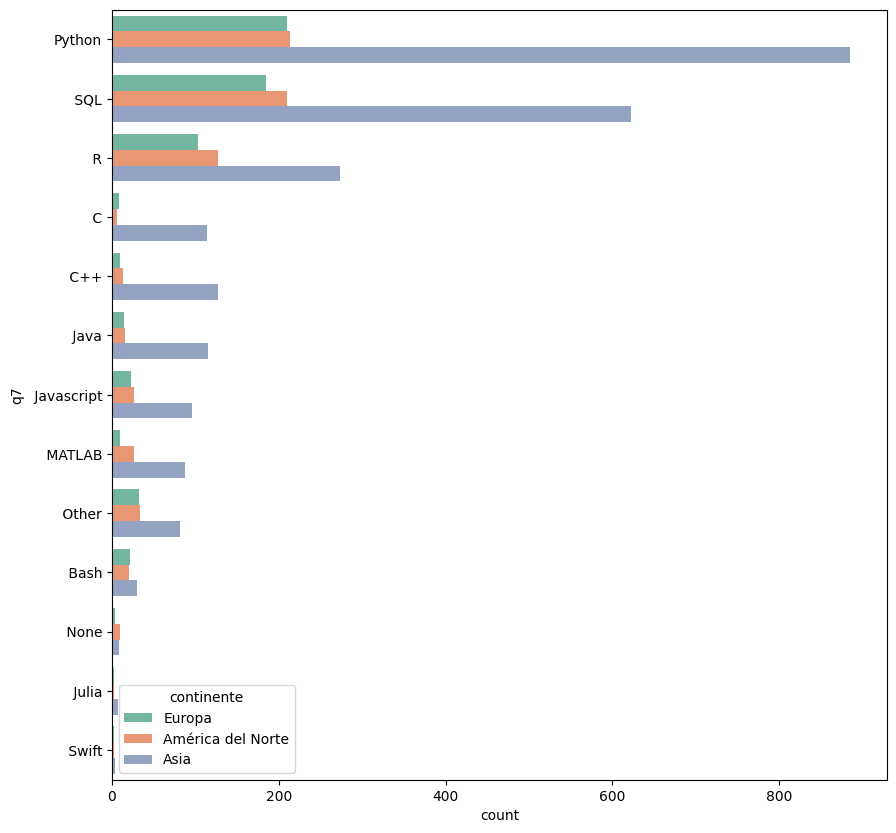

In [141]:
plt.figure(figsize = (10,10))
sns.countplot(y='q7', hue = 'continente', data = df_eaa, palette = 'Set2')

-------------------------------------------------------------

In [ ]:
# #probamos rename
# def renombrar_columnas(dataframe,inicio,final,num_q):
#     nom_col = {}
#     for col in dataframe.columns[inicio : final+1]:
#         try: 
#             for i in dataframe[col].unique():
#                 i = str(i) 
#                 if i != 'nan':
#                     i = i.strip().replace(' ', '_')
#                     nom_col[col] = f'q{num_q}_{i}'
#                 else:
#                     pass
#         except:
#             print('estoy en el except con la columna {col} , elemento {i}')
            
#     renombrado = dataframe.rename(columns = nom_col)
    
#     return renombrado

In [ ]:
df = renombrar_columnas(df, 8, 24, 10)


In [ ]:
df.sample(3)

In [ ]:
df = renombrar_columnas(df, 28, 37, 39)

In [ ]:
df.columns

In [ ]:
df_ana = df.copy()
df_ana.head(2)

In [ ]:
df_ana.columns

In [ ]:
df_ana2 = df_ana[['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9']]
df_ana2.head(2)

In [ ]:
df_ana2["q7"] = df_ana2["q7"].str.split(",")

In [ ]:
df_ana2.head(2)

In [ ]:
df_q7 = df_ana2.explode("q7")
df_q7.head()

In [ ]:
sns.countplot(x = "q7", data = df_q7, hue = "q6")

In [ ]:
#funcion para cambiar los nans
def yes_no(dataframe, inicio, final):
    for col in dataframe.columns[inicio:(final+1)]:
        dataframe[col] = dataframe[col].apply(lambda data: np.where(type(data) != float, 'yes', 'no'))
    return dataframe

In [ ]:
df = yes_no(df, 8, 24)

In [ ]:
df = yes_no(df, 28, 37)

In [ ]:
df.sample(3)

In [ ]:
df.isnull().sum().reset_index().T

In [ ]:
q7_responses = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

In [ ]:
# def sacar_herramienta(col):
    
#     try:
#         if re.findall(patron, col):
#             return 'yes'
#         else:
#             return 'no'
#     except:
#         return 'unknown'


In [ ]:
def sacar_herramienta(col):
    
    try:
        if re.findall(patron, col):
            return 1
        else:
            return 0
    except:
        return np.nan

In [ ]:
for patron in q7_responses:
    df[f'q7_{patron}'] = df['q7'].apply(sacar_herramienta)

df.drop(columns = 'q7', inplace = True)

In [ ]:
df.head(2)

In [ ]:
q9_responses = ['JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code (VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim, Emacs or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']

In [ ]:
for patron in q9_responses:
    df[f'q9_{patron}'] = df['q9'].apply(sacar_herramienta)
df.drop(columns = 'q9', inplace = True)

In [ ]:
q14_responses = ['Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']
for patron in q14_responses:
    df[f'q14_{patron}'] = df['q14'].apply(sacar_herramienta)

df.drop(columns = 'q14', inplace = True)

In [ ]:
q41_responses = ['Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 
                 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 
                 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Other']
for patron in q14_responses:
    df[f'q41_{patron}'] = df['q41'].apply(sacar_herramienta)

df.drop(columns = 'q41', inplace = True)

In [ ]:
df.sample(3)

In [ ]:
orden = ['age', 'gender', 'q3', 'q4', 'q6', 'q7_Python', 'q7_R', 'q7_SQL', 'q7_C', 'q7_C++', 'q7_Java', 'q7_Javascript', 'q7_Julia','q7_Swift', 'q7_Bash', 'q7_MATLAB', 
         'q7_None', 'q7_Other','q8', 'q9_JupyterLab', 'q9_RStudio', 'q9_Visual Studio','q9_Visual Studio Code (VSCode)', 'q9_PyCharm', 'q9_Spyder','q9_Notepad++', 
         'q9_Sublime Text', 'q9_Vim, Emacs or similar', 'q9_MATLAB', 'q9_Jupyter Notebook', 'q9_None', 'q9_Other','q10_Kaggle_Notebooks','q10_Colab_Notebooks', 'q10_Azure_Notebooks',
         'q10_Paperspace_/_Gradient', 'q10_Binder_/_JupyterHub', 'q10_Code_Ocean', 'q10_IBM_Watson_Studio', 'q10_Amazon_Sagemaker_Studio_Notebooks', 'q10_Amazon_EMR_Notebooks',
         'q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI)', 'q10_Google_Cloud_Datalab', 'q10_Databricks_Collaborative_Notebooks', 'q10_Zeppelin_/_Zepl_Notebooks', 'q10_Deepnote_Notebooks',
         'q10_Observable_Notebooks', 'q10_None', 'q10_Other', 'q14_Seaborn', 'q14_Plotly / Plotly Express', 'q14_Ggplot / ggplot2', 'q14_Shiny', 'q14_D3 js', 'q14_Altair', 'q14_Bokeh', 
         'q14_Geoplotlib','q14_Leaflet / Folium', 'q14_None', 'q14_Other','q34', 'q35', 'q39_Plotly_Dash', 'q39_Streamlit', 'q39_NBViewer', 'q39_GitHub', 'q39_Personal_blog', 'q39_Kaggle', 
         'q39_Colab', 'q39_Shiny', 'q39_I_do_not_share_my_work_publicly', 'q39_Other', 'q41_Seaborn', 'q41_Plotly / Plotly Express', 'q41_Ggplot / ggplot2', 'q41_Shiny', 'q41_D3 js', 
         'q41_Altair', 'q41_Bokeh', 'q41_Geoplotlib', 'q41_Leaflet / Folium', 'q41_None', 'q41_Other']

In [ ]:
df = df.reindex(columns = orden)

In [ ]:
df.sample()

In [ ]:
df_q7 = df[df.columns[5:18]]

In [ ]:
q7_count = df_q7.sum().reset_index()

In [ ]:
q7_count.columns = ['herramienta', 'conteo']

In [ ]:
q7_count

In [ ]:
sns.barplot(y = 'herramienta', x= 'conteo', data = q7_count)

In [ ]:
sns.barplot(y = 'herramienta', x = ,hue = 'gender', data = df)

In [ ]:
for col in df.columns[5:18]:
    print(f'{col}')
    display(df[col].value_counts().reset_index())